# Importing libraries


In [2]:
import numpy as np
import pandas as pd
# import pandas_datareader as web
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
import os


ModuleNotFoundError: No module named 'keras'

# Importing dataset using source yahoo

In [2]:
df=web.DataReader('AAPL',data_source='yahoo',start='2014-08-19', end='2020-06-22')
# import yfinance as yf                                   # if pandas_datareader is not working
# data = yf.download('AAPL', start = '2012-01-01', end='2017-01-01')

In [4]:
# df=pd.read_csv('GOOG.csv',date_parser=True)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-16,353.200012,344.720001,351.459991,352.079987,41357200.0,352.079987
2020-06-17,355.399994,351.089996,355.149994,351.589996,28532000.0,351.589996
2020-06-18,353.450012,349.220001,351.410004,351.730011,24205100.0,351.730011
2020-06-19,356.559998,345.149994,354.640015,349.720001,66119000.0,349.720001
2020-06-22,359.459991,351.149994,351.339996,358.869995,33719700.0,358.869995


In [6]:
# Preprocessing and feature extraction

In [10]:
df=df['Open'].values
df=df.reshape(-1,1)
print(df.shape)
df[:5]


(1472, 1)


array([[ 98.48999786],
       [ 99.41000366],
       [100.44000244],
       [100.56999969],
       [100.29000092]])

# Spliting dataset into training and testing

In [11]:
dataset_train=np.array(df[:int(df.shape[0]*0.8)])
dataset_test= np.array(df[int(df.shape[0]*0.8)-50:])

print(df.shape)
print(dataset_train.shape)
print(dataset_test.shape)

(1472, 1)
(1177, 1)
(345, 1)


In [12]:
# Now  Normilizing

In [13]:
scaler= MinMaxScaler(feature_range=(0,1))
dataset_train=scaler.fit_transform(dataset_train)
dataset_train[:5]

array([[0.06030685],
       [0.06684191],
       [0.07415828],
       [0.07508169],
       [0.07309278]])

In [14]:
dataset_test=scaler.transform(dataset_test)
dataset_test[:5]

array([[0.56108827],
       [0.57572101],
       [0.56897291],
       [0.5781361 ],
       [0.56620264]])

In [15]:
def creat_dataset(df):
    x=[]
    y=[]
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i,0])
        y.append(df[i,0])
        
    x=np.array(x)
    y=np.array(y)
    
    return x,y
        
    
    
    

In [16]:
x_train, y_train= creat_dataset(dataset_train)
x_train[:1]

array([[0.06030685, 0.06684191, 0.07415828, 0.07508169, 0.07309278,
        0.0837477 , 0.08111946, 0.07827814, 0.08232701, 0.09134821,
        0.09276884, 0.09305298, 0.06286403, 0.0625089 , 0.06606054,
        0.06449781, 0.0568973 , 0.07394519, 0.07962778, 0.09099302,
        0.06961218, 0.08005396, 0.08474215, 0.08729934, 0.08381875,
        0.07529478, 0.08637593, 0.07465551, 0.06059098, 0.0614434 ,
        0.07678646, 0.07522373, 0.0658474 , 0.067055  , 0.07067763,
        0.06698395, 0.06222476, 0.08197188, 0.0759341 , 0.0804802 ,
        0.07380309, 0.05661316, 0.03942324, 0.05327461, 0.0590993 ,
        0.0924847 , 0.09120611, 0.10001422, 0.10782782, 0.10548372]])

In [18]:
x_test, y_test= creat_dataset(dataset_test)
x_test[:1]

array([[0.56108827, 0.57572101, 0.56897291, 0.5781361 , 0.56620264,
        0.57714164, 0.56620264, 0.57671546, 0.58104847, 0.57948574,
        0.59781222, 0.59461577, 0.59106412, 0.59894877, 0.59866458,
        0.60868023, 0.61045605, 0.60143486, 0.59575221, 0.57053564,
        0.6072596 , 0.63929536, 0.65527774, 0.66699812, 0.67374632,
        0.68049442, 0.69860781, 0.68354878, 0.71047027, 0.74825968,
        0.72105409, 0.72211965, 0.70144908, 0.70286971, 0.70912063,
        0.72197756, 0.71807073, 0.73341384, 0.74435285, 0.75614432,
        0.75593123, 0.7836341 , 0.77198461, 0.78739883, 0.77567835,
        0.77127435, 0.77752527, 0.77809344, 0.8035232 , 0.8014633 ]])

# Now Reshapping Feature for LSTM model

In [36]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

print(x_train.shape)
print(x_test.shape)

(1127, 50, 1)
(295, 50, 1)


# Building Moel

In [21]:
model= Sequential()

model.add( LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add( LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))

model.add( LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=96))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(loss='mean_squared_error', optimizer='adam')


# Model saving for future use

In [22]:
if( not os.path.exists('stock-prediction.h5')):
    model.fit(x_train,y_train, epochs=50, batch_size=32)
    model.save('stock-prediction.h5')

In [23]:
model=load_model('stock-prediction.h5')

# Visualization

In [25]:
predictions= model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [38]:
predictions.shape

(295, 1)

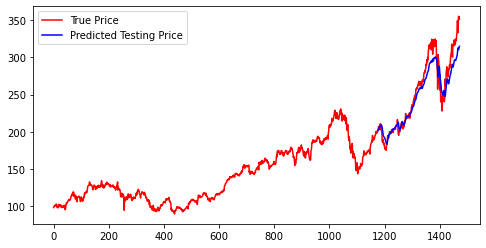

In [26]:
fig,ax= plt.subplots(figsize=(8,4))
plt.plot(df,color='red', label='True Price')
ax.plot(range(len(y_train)+50,len(y_train)+50+len(predictions)),predictions, color='blue', label='Predicted Testing Price')
plt.legend()

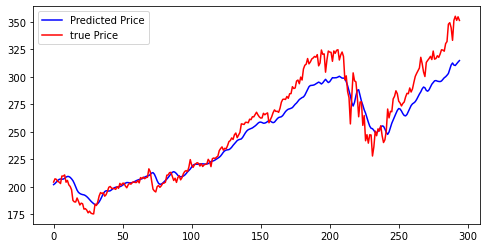

In [31]:
y_test_scaled= scaler.inverse_transform(y_test.reshape(-1,1))

fig,ax= plt.subplots(figsize=(8,4))

plt.plot(predictions,color='blue', label='Predicted Price')
ax.plot(y_test_scaled, color='red', label='true Price')
plt.legend()

In [32]:
pwd

'C:\\Users\\Zeeshan Haleem\\Downloads\\Z-Jupyter'

In [1]:
!jt -t T

Didn't recognize theme name: T
Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [14]:
!jt -t  grade3